In [3]:
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import dlib
import cv2
 
import face_recognition

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [4]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [5]:
# face_landmark_path = 'lib/landmark/shape_predictor_68_face_landmarks.dat'
# predictor = dlib.shape_predictor(face_landmark_path)
detector = dlib.get_frontal_face_detector()
predictor = face_recognition.api.pose_predictor_68_point

In [6]:
!pwd

/Users/minjun/ground/mobilex-cctv-project/code/face-detection


In [98]:
image_path = '/Users/minjun/ground/mobilex-cctv-project/code/face-detection/asset/main-config.png' 
org_image = cv2.imread(image_path) 
image = org_image.copy() 
image = imutils.resize(image, width=500) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
 
rects = detector(gray, 1)

In [78]:
# # define a dictionary that maps the indexes of the facial
# # landmarks to specific face regions
# from collections import OrderedDict
# FACIAL_LANDMARKS_IDXS = OrderedDict([
#    ("mouth", (48, 68)),
#    ("right_eyebrow", (17, 22)),
#    ("left_eyebrow", (22, 27)),
#    ("right_eye", (36, 42)),
#    ("left_eye", (42, 48)),
#    ("jaw", (0, 17))
# ])

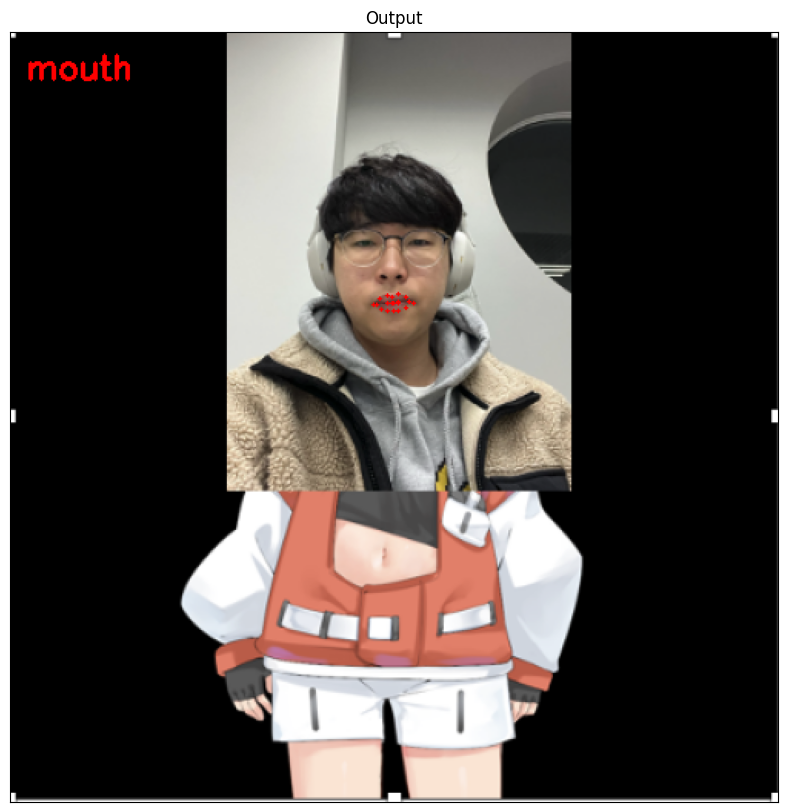

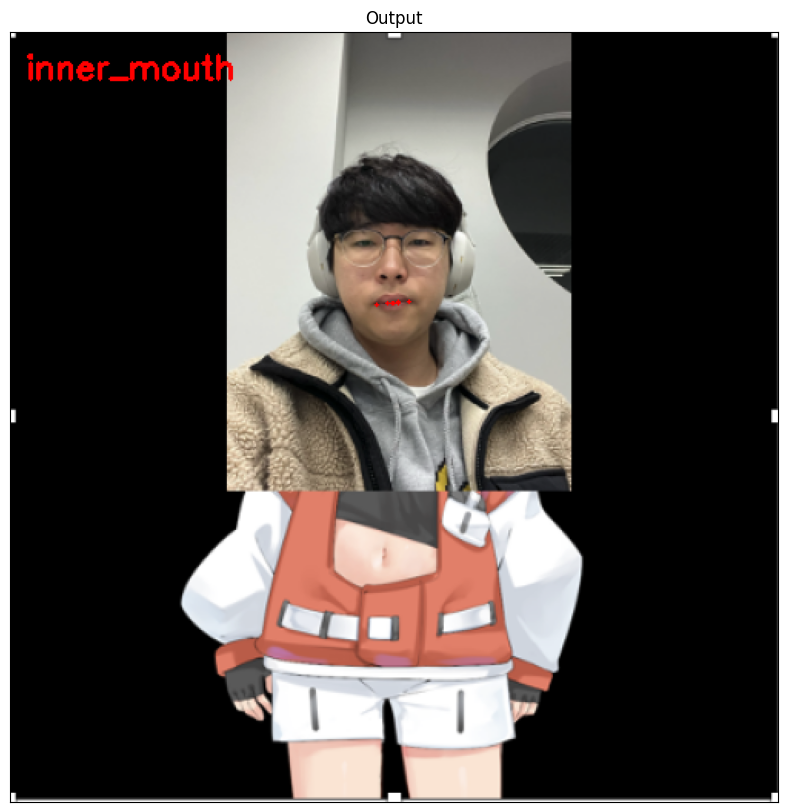

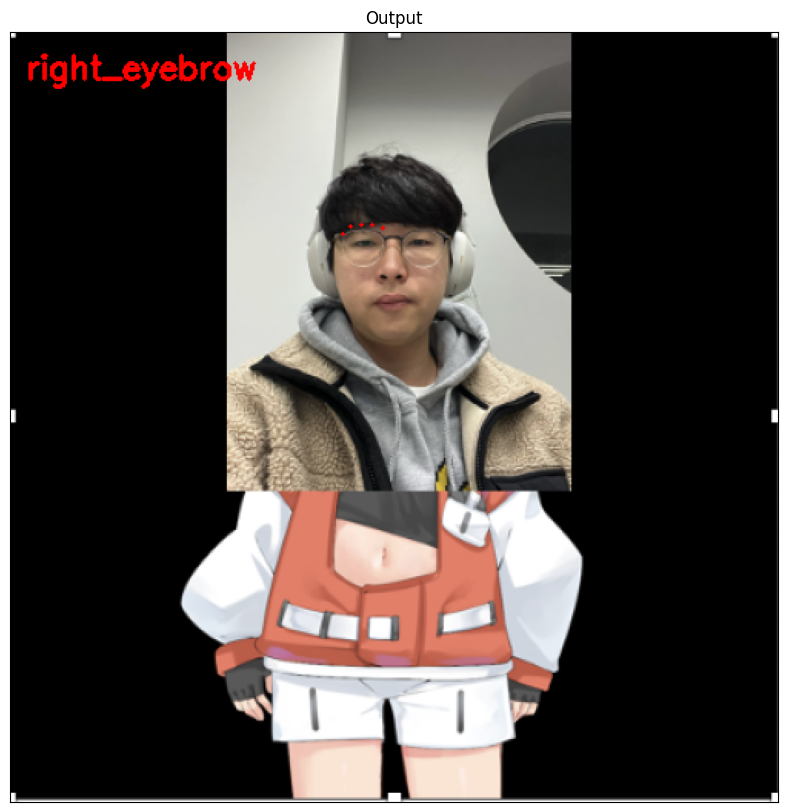

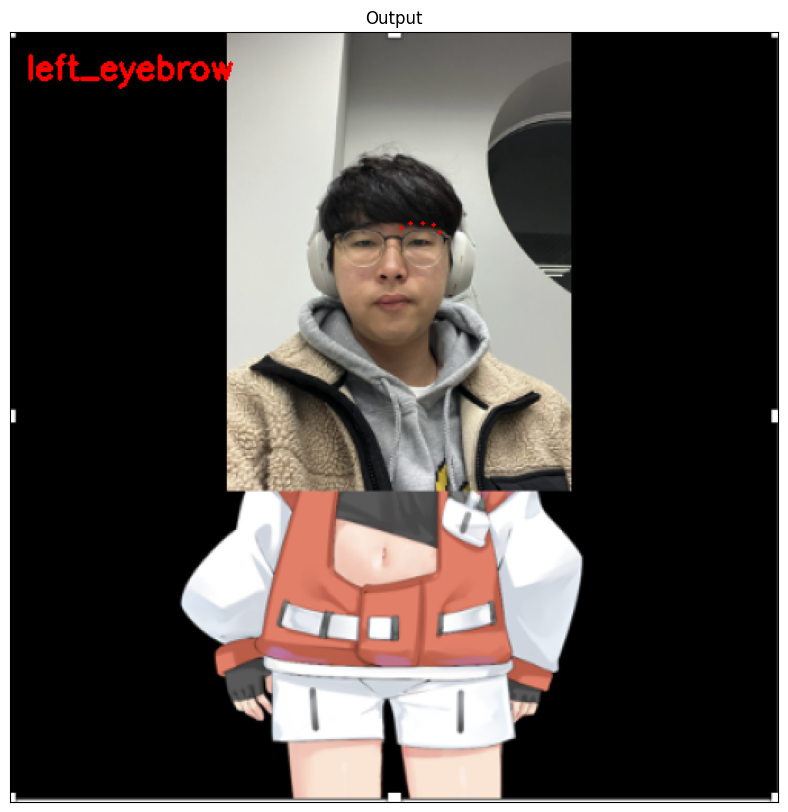

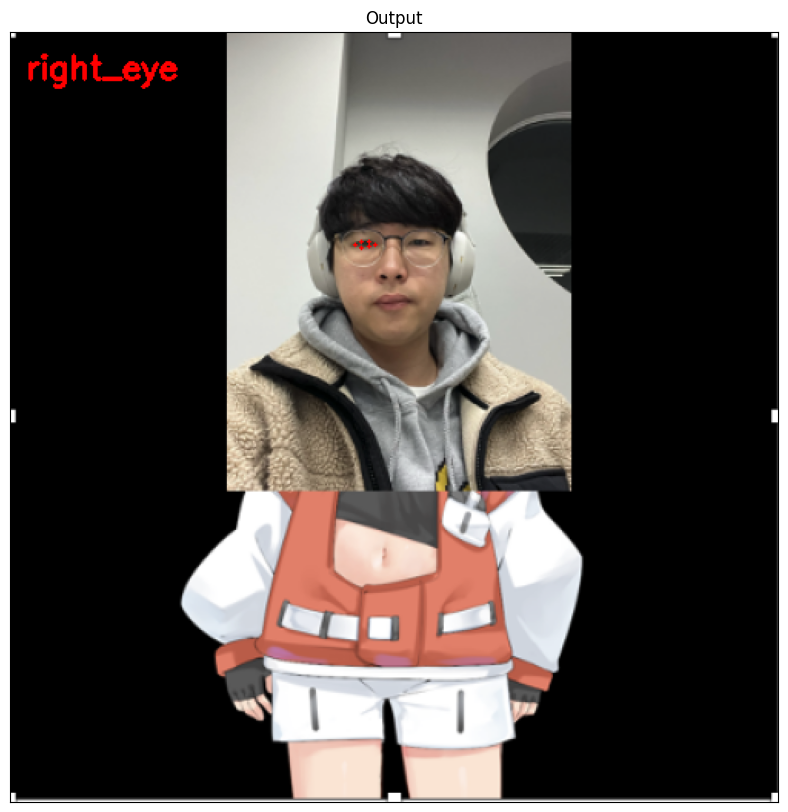

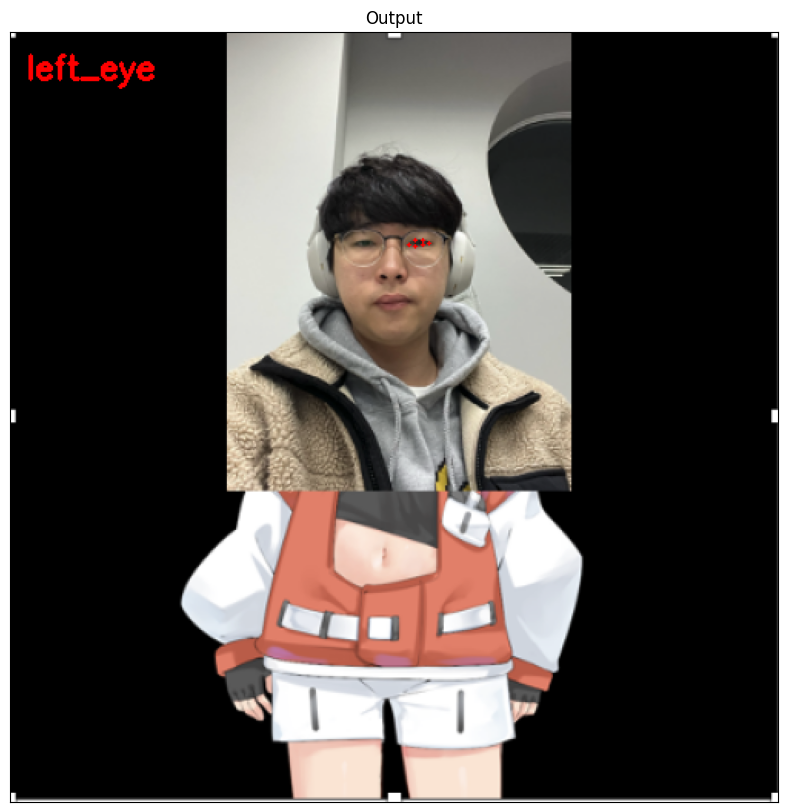

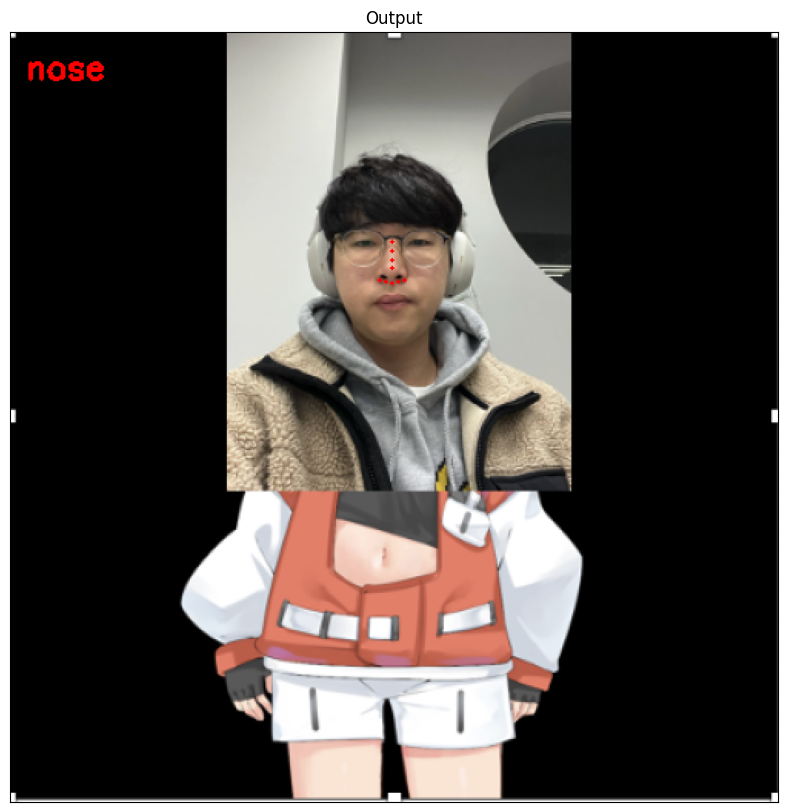

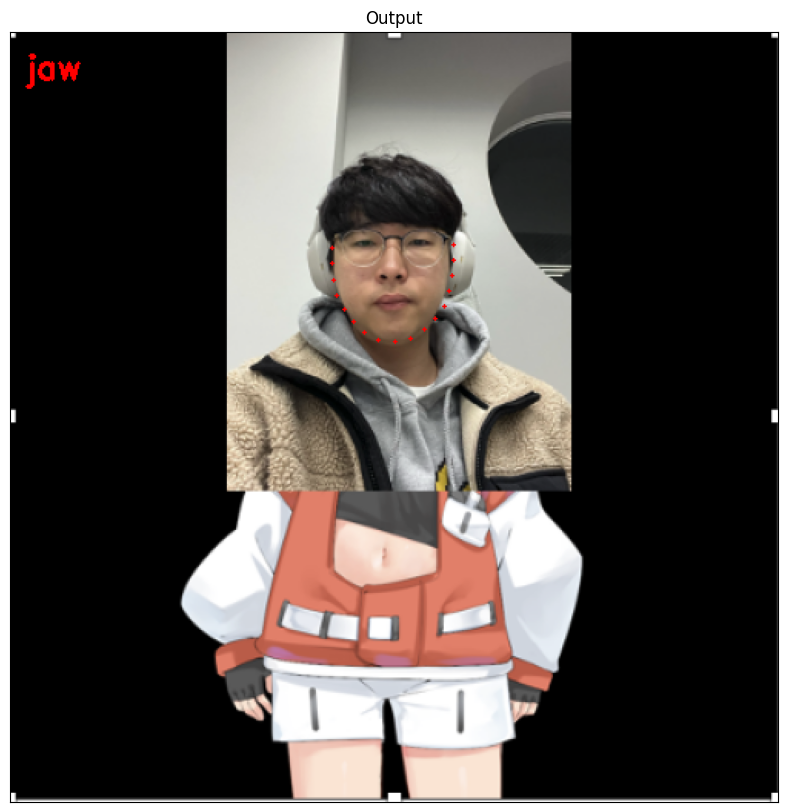

In [84]:
# for (i, rect) in enumerate(rects):
#    # determine the facial landmarks for the face region, then
#    # convert the landmark (x, y)-coordinates to a NumPy array
#    shape = predictor(gray, rect)
#    shape = face_utils.shape_to_np(shape)
#    # loop over the face parts individually
#    for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
#       # clone the original image so we can draw on it, then
#       # display the name of the face part on the image
#       clone = image.copy()
#       cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
#          0.7, (0, 0, 255), 2)
#       # loop over the subset of facial landmarks, drawing the
#       # specific face part
#       for (x, y) in shape[i:j]:
#          cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
#       plt_imshow("Output", clone, figsize=(16,10))  


Detect Face!!!


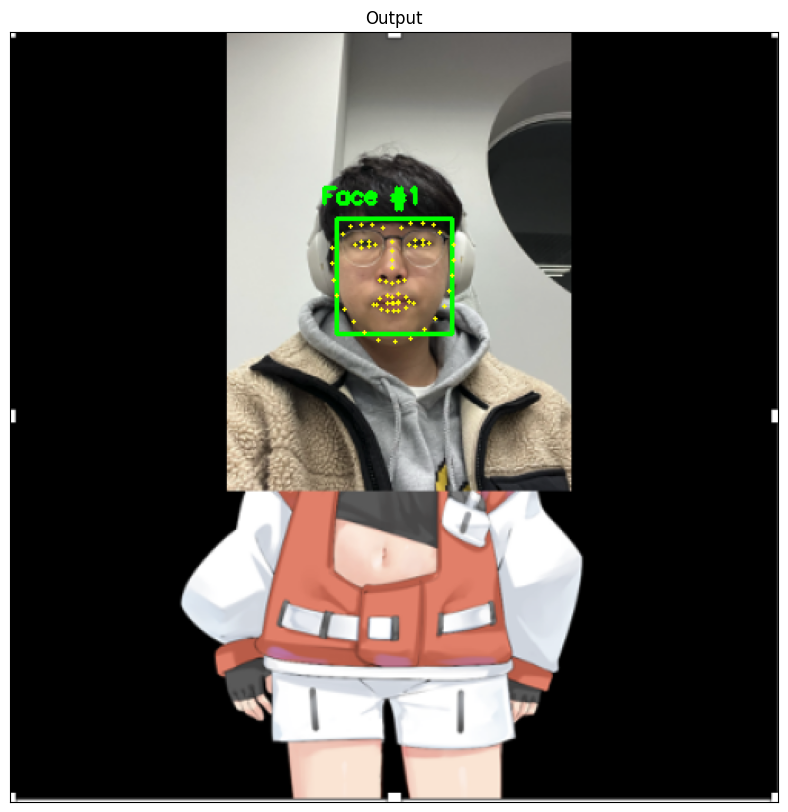

{209: 150, 210: 161, 212: 171, 217: 180, 223: 188, 230: 195, 239: 200, 250: 201, 260: 124, 269: 193, 276: 186, 282: 178, 285: 168, 287: 158, 288: 138, 216: 131, 221: 126, 228: 140, 235: 125, 242: 127, 254: 127, 268: 138, 275: 125, 279: 130, 248: 176, 240: 173, 244: 162, 252: 176, 256: 161, 224: 138, 233: 139, 237: 138, 259: 175, 263: 139, 272: 137, 236: 177, 245: 176, 257: 179, 262: 176, 249: 176, 241: 180, 238: 177}


{248: 176, 252: 176, 259: 175, 262: 176, 249: 176}

In [99]:
classfication = {}
for (i, rect) in enumerate(rects):
    # 얼굴 영역의 얼굴 랜드마크를 결정한 다음 
    # 얼굴 랜드마크(x, y) 좌표를 NumPy Array로 변환합니다.
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    print("Detect Face!!!")
    # dlib의 사각형을 OpenCV bounding box로 변환(x, y, w, h)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    #얼굴 랜드마크에 포인트를 그립니다.
    for (i, (x, y)) in enumerate(shape):
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
        classfication[x]=y
        # cv2.putText(image, str(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), 1)
plt_imshow("Output", image, figsize=(16,10))
print(classfication)

# easy vtuber를 위한 offset
result = {k: v for k, v in classfication.items() if 247 <= k <= 264 and 168 <= v <= 178}
result